In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
from ggplot import *
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import Imputer

%matplotlib inline

## Confusion Matrix

In [2]:
def measure_quality(y_true, y_pred):
    def f_beta_1(y_true, y_pred): return fbeta_score(y_true, y_pred, 1)
    def f_beta_2(y_true, y_pred): return fbeta_score(y_true, y_pred, 2)
    def f_beta_3(y_true, y_pred): return fbeta_score(y_true, y_pred, 3)
    def f_beta_4(y_true, y_pred): return fbeta_score(y_true, y_pred, 4)
    
    metrics = [
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        f_beta_1,
        f_beta_2,
        f_beta_3,
        f_beta_4,
        confusion_matrix, 
        classification_report]

    for metric in metrics:
        print(metric.__name__)
        print metric(y_true, y_pred)
        print("")

In [3]:
measure_quality(y_true=[0]*50 + [1] * 20, y_pred=[0]*68 + [1]*2 )

accuracy_score
0.742857142857

precision_score
1.0

recall_score
0.1

f1_score
0.181818181818

f_beta_1
0.181818181818

f_beta_2
0.121951219512

f_beta_3
0.10989010989

f_beta_4
0.105590062112

confusion_matrix
[[50  0]
 [18  2]]

classification_report
             precision    recall  f1-score   support

          0       0.74      1.00      0.85        50
          1       1.00      0.10      0.18        20

avg / total       0.81      0.74      0.66        70




## ROC Curves
Receiving Operating Characteristic, or ROC, is a visual way for inspecting the performance of a binary classifier (0/1).

In [4]:
def plot_roc_auc(y_test, y_pred):
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr,tpr)

    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    return ggplot(df, aes(x='fpr', y='tpr')) +\
        geom_line(size=2, color='red') +\
        geom_area(alpha=0.2, fill="#0091FF") +\
        geom_abline(linetype='dashed', intercept =0, slope=1) +\
        ggtitle('ROC Curve\nAUC={0}'.format(auc)) +\
        xlab("FPR") +\
        ylab("TPR") +\
        theme_bw()


### The ideal ROC curve, AUC = 1.0

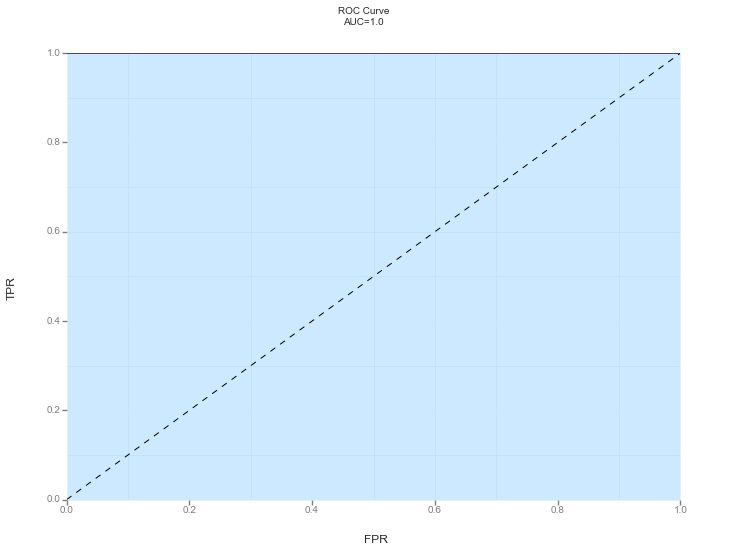

<ggplot: (296112737)>

In [5]:
plot_roc_auc([1]*20 + [0]*80, [1]*20 + [0]*80)

### Guessing, AUC=0.5
Random answer

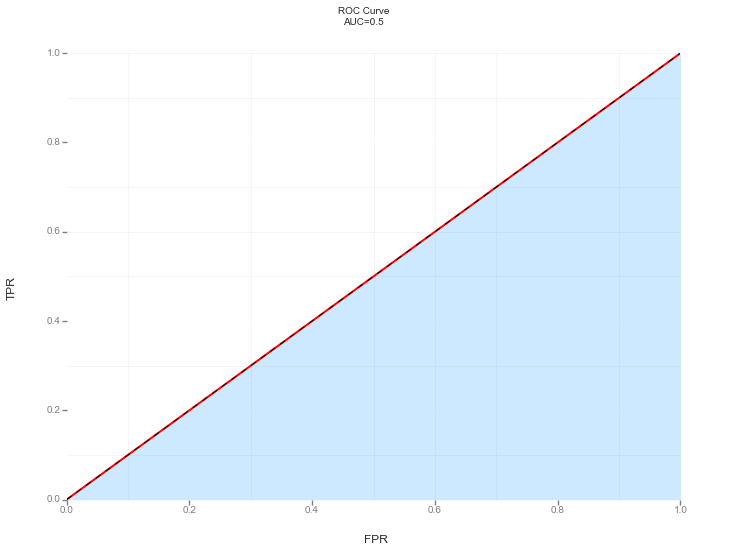

<ggplot: (296137869)>

In [6]:
np.random.seed(1)
plot_roc_auc([1]*20 + [0]*80, np.random.randint(2, size=100))

### Worse than guessing

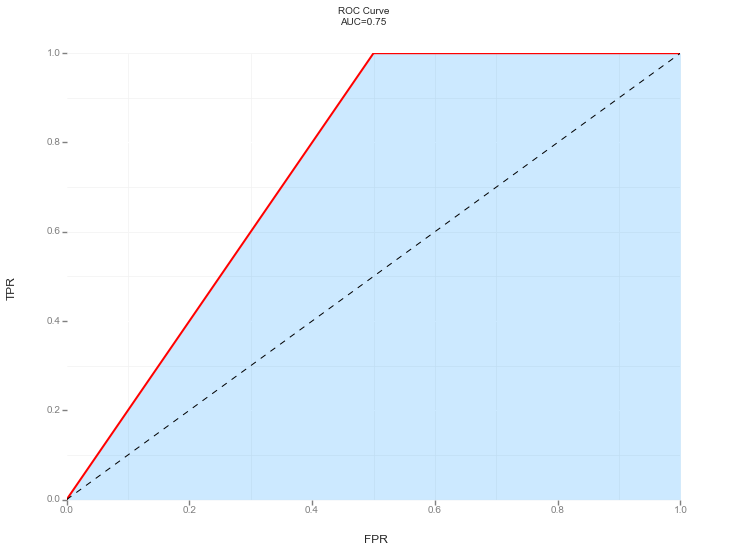

<ggplot: (296416661)>

In [7]:
plot_roc_auc([1]*20 + [0]*80, [1]*60 + [0]*40)

In [8]:
def build_model_and_predict(X_train, X_test, y_train, model=LogisticRegression()): 
    model.fit(X_train, y_train)
    return model.predict_proba(X_test)[:,1]

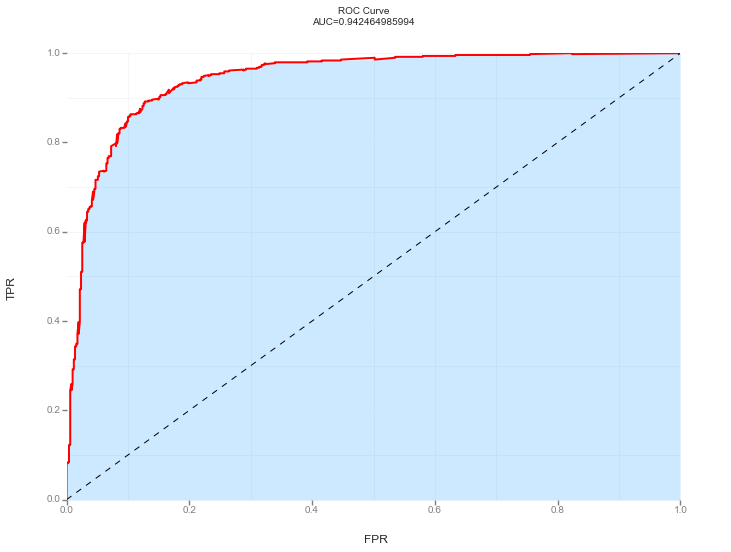

<ggplot: (291256421)>

In [9]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=2)
X_train = X[:9000]
X_test = X[9000:]
y_train = y[:9000]
y_test = y[9000:]

y_pred = build_model_and_predict(X_train, X_test, y_train)
plot_roc_auc(y_test, y_pred)

## Titanic

In [10]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
features = ['pclass']
X = titanic[features].values
y = titanic['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

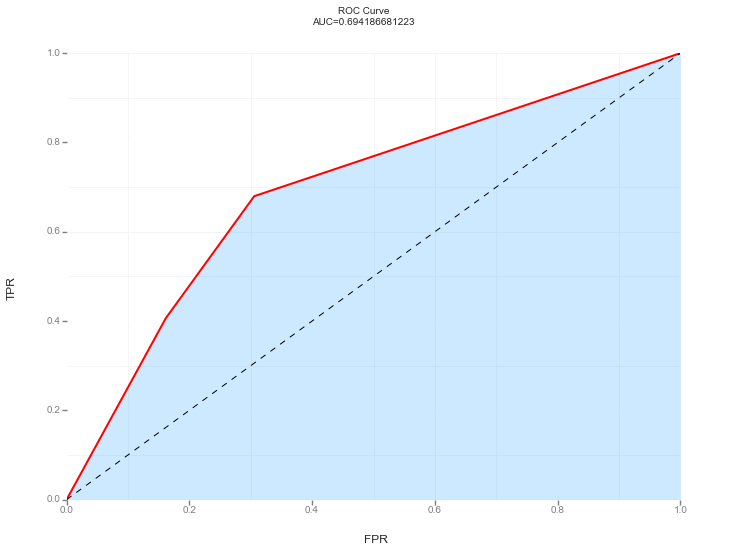

<ggplot: (291256545)>

In [12]:
y_pred = build_model_and_predict(X_train, X_test, y_train)
plot_roc_auc(y_test, y_pred)

In [13]:
columns = list(titanic.columns[ (titanic.dtypes == 'int') | (titanic.dtypes == 'float') ])
columns.remove('survived')
X = titanic[columns].values
X = Imputer(strategy='mean').fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)


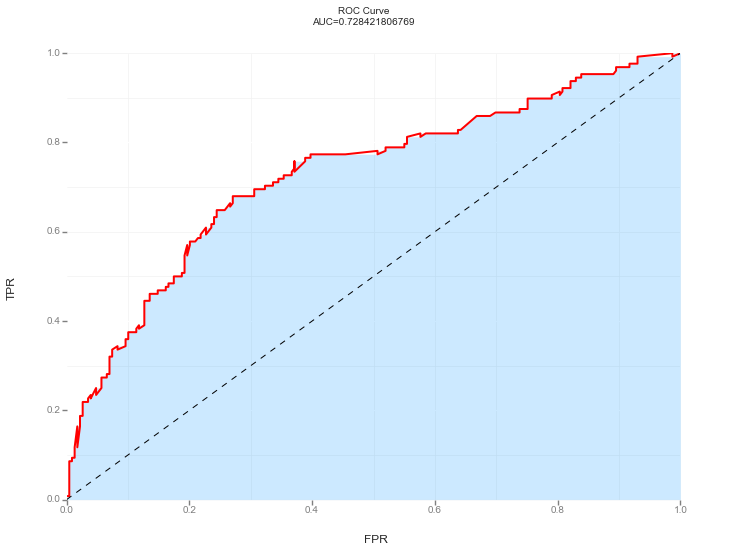

<ggplot: (296116801)>

In [14]:
y_pred = build_model_and_predict(X_train, X_test, y_train)
plot_roc_auc(y_test, y_pred)

## Related Reading

* http://navan.name/roc/
* http://blog.yhat.com/posts/roc-curves.html
* https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf